<a href="https://colab.research.google.com/github/piyushpatro/Stock-Price/blob/main/LSTM_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr

In [ ]:
df=pdr.get_data_tiingo('AAPL', api_key='f2f9d9ed5a8b0873b7a9ca1e666affacc8afec9a')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-29 00:00:00+00:00,96.69,98.2300,96.65,96.86,35216277,22.479143,22.837172,22.469843,22.518665,140865108,0.0,1.0
1,AAPL,2016-03-01 00:00:00+00:00,100.53,100.7700,97.42,97.65,50407147,23.371892,23.427688,22.648858,22.702330,201628588,0.0,1.0
2,AAPL,2016-03-02 00:00:00+00:00,100.75,100.8900,99.64,100.51,33169560,23.423039,23.455587,23.164978,23.367242,132678240,0.0,1.0
3,AAPL,2016-03-03 00:00:00+00:00,101.50,101.7099,100.45,100.58,36955742,23.597404,23.646203,23.353293,23.383516,147822968,0.0,1.0
4,AAPL,2016-03-04 00:00:00+00:00,103.01,103.7500,101.37,102.37,46055100,23.948459,24.120499,23.567180,23.799667,184220400,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-02-18 00:00:00+00:00,129.71,129.995,127.41,129.20,96856748,129.71,129.995,127.41,129.20,96856748,0.0,1.0
1253,AAPL,2021-02-19 00:00:00+00:00,129.87,130.710,128.80,130.24,87668834,129.87,130.710,128.80,130.24,87668834,0.0,1.0
1254,AAPL,2021-02-22 00:00:00+00:00,126.00,129.720,125.60,128.01,102886922,126.00,129.720,125.60,128.01,102886922,0.0,1.0
1255,AAPL,2021-02-23 00:00:00+00:00,125.86,126.710,118.39,123.76,158273022,125.86,126.710,118.39,123.76,158273022,0.0,1.0
1256,AAPL,2021-02-24 00:00:00+00:00,125.35,125.560,122.23,124.94,111039904,125.35,125.560,122.23,124.94,111039904,0.0,1.0


In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df=df['close']

In [ ]:
df=np.array(df)

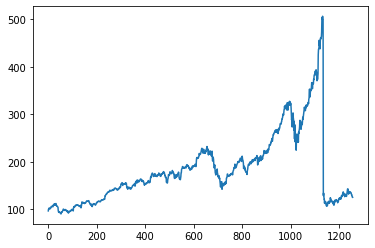

In [ ]:
plt.plot(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df.reshape(-1,1))

In [ ]:
train_dataset=df[0:int(len(df)*0.7), 0]

In [ ]:
train_dataset

In [ ]:
test_dataset=df[len(train_dataset):len(df),0]

In [ ]:
test_dataset.shape

(378,)

In [ ]:
def create_dataset(dataset, time_stamp):
  dataX=[]
  dataY=[]
  a=[]
  for i in range(0, len(dataset)-time_stamp-1):
    a=dataset[i:i+time_stamp, ]
    dataX.append(a)
    dataY.append(dataset[i+time_stamp])
  return np.array(dataX), np.array(dataY)

In [ ]:
X_train, y_train=create_dataset(train_dataset, time_stamp=100)
print(X_train.shape, y_train.shape)

(778, 100) (778,)


In [ ]:
X_test, y_test=create_dataset(test_dataset, time_stamp=100)
print(X_test.shape, y_test.shape)

(277, 100) (277,)


In [ ]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(256))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 64)           16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 510,209
Trainable params: 510,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=64, verbose=1)

Epoch 1/64
25/25 [==============================] - 11s 69ms/step - loss: 0.0229 - val_loss: 0.0309
Epoch 2/64
25/25 [==============================] - 0s 19ms/step - loss: 0.0016 - val_loss: 0.0296
Epoch 3/64
25/25 [==============================] - 0s 19ms/step - loss: 8.8851e-04 - val_loss: 0.0284
Epoch 4/64
25/25 [==============================] - 0s 19ms/step - loss: 6.0544e-04 - val_loss: 0.0282
Epoch 5/64
25/25 [==============================] - 0s 19ms/step - loss: 4.6214e-04 - val_loss: 0.0284
Epoch 6/64
25/25 [==============================] - 0s 19ms/step - loss: 4.9455e-04 - val_loss: 0.0278
Epoch 7/64
25/25 [==============================] - 0s 19ms/step - loss: 4.7361e-04 - val_loss: 0.0278
Epoch 8/64
25/25 [==============================] - 0s 19ms/step - loss: 4.1425e-04 - val_loss: 0.0268
Epoch 9/64
25/25 [==============================] - 0s 19ms/step - loss: 4.6598e-04 - val_loss: 0.0279
Epoch 10/64
25/25 [==============================] - 0s 19ms/step - loss: 4.4224

In [ ]:
pred=model.predict(X_test)

In [ ]:
print(scaler.inverse_transform(pred))

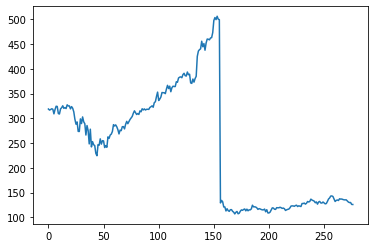

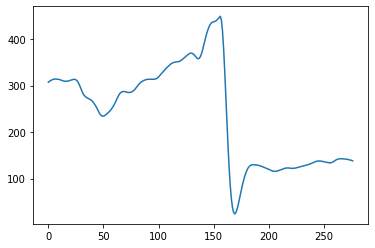

In [ ]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)))
plt.show()
plt.plot(scaler.inverse_transform(pred))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse=mean_squared_error(y_test, pred)

In [ ]:
print(scaler.inverse_transform(mse.reshape(-1,1)))

[[95.48450393]]


In [ ]:
print(X_test.shape, y_test.shape)

(277, 100, 1) (277,)


In [ ]:
X_test[-1].shape

(100, 1)

In [ ]:
dataX=X_test[-1,:,:]

In [ ]:
dataY=model.predict(dataX.reshape(1,100,1))

In [ ]:
for i in range(100):
  dataX=np.append(dataX, dataY[-1])
  dataX=dataX[1:]
  dataY=np.append(dataY, model.predict(dataX.reshape(1,100,1)))

In [ ]:
print(scaler.inverse_transform(dataY.reshape(-1,1)))

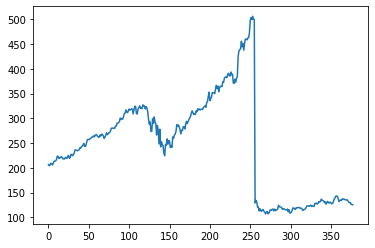

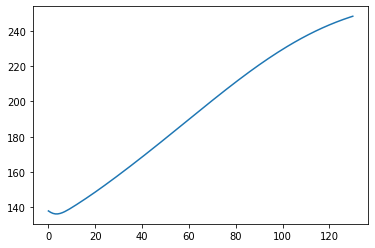

In [ ]:
plt.plot(scaler.inverse_transform(test_dataset.reshape(-1,1)))
plt.show()
plt.plot(scaler.inverse_transform(dataY.reshape(-1,1)))
plt.show()